In [2]:
import numpy as np
import pandas as pd

In [3]:
df_final = pd.read_csv('df_final.csv') # this df_final has already applied criteria

/home/ziwen/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (16,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
len(df_final) # df_final has applied criteria

10527244

In [6]:
df_final.columns.values

array(['Unnamed: 0', 'Unnamed: 0.1', 'CO_SEQNUM', 'DOD_YY', 'DOB_YY',
       'DOB_MM', 'DOB_TT', 'DOB_WK', 'BFACIL', 'BFACIL3', 'MAGER',
       'MBSTATE_REC', 'RESTATUS', 'MRACE31', 'MRACE6', 'MRACE15',
       'MBRACE', 'MRACEIMP', 'MAR_P', 'DMAR', 'MEDUC', 'F_MEDUC',
       'FAGECOMB', 'FRACE31', 'FRACE6', 'FRACE15', 'FEDUC', 'F_FEDUC',
       'PRIORLIVE', 'PRIORDEAD', 'PRIORTERM', 'LBO_REC', 'TPO_REC',
       'ILLB_R', 'ILLB_R11', 'ILP_R', 'ILP_R11', 'PRECARE', 'PREVIS',
       'F_TPCV', 'CIG_0', 'CIG_1', 'CIG_2', 'CIG_3', 'F_CIGS_0',
       'F_CIGS_1', 'F_CIGS_2', 'F_CIGS_3', 'CIG_REC', 'F_TOBACO', 'BMI',
       'BMI_R', 'WTGAIN', 'WTGAIN_REC', 'F_WTGAIN', 'RF_PDIAB',
       'RF_GDIAB', 'RF_PHYPE', 'RF_GHYPE', 'RF_EHYPE', 'RF_PPB',
       'F_RF_PDIAB', 'F_RF_GDIAB', 'F_RF_PHYPE', 'F_RF_GHYPE',
       'F_RF_EHYPE', 'F_RF_PPB', 'RF_INFT', 'RF_DRG', 'RF_ART',
       'F_RF_DRG', 'F_RF_ART', 'RF_CESAR', 'F_RF_CESAR', 'F_RF_NCESAR',
       'RF_CESARN', 'NO_RISKS', 'NO_INFEC', 'CO_DODYY', 

In [7]:
# # prepare dataset for ml model
df_or = df_final[['FRACE15', 'MRACE15', 'DMAR', 'MEDUC', 'FEDUC', 'MBSTATE_REC', 'PAY_REC', 'RF_PDIAB', 'RF_GDIAB', 'RF_PHYPE', 'RF_GHYPE', 'RF_EHYPE',
              'RF_PPB', 'SEX', 'CIG_REC', 'PRECARE', 'RF_INFT', 'NO_INFEC', 'MAGER', 'FAGECOMB', 'BMI', 'TPO_REC', 'OEGest_Comb', 
               'ME_PRES', 'BFACIL', 'RDMETH_REC']]

In [8]:
df_or.to_csv('df_or.csv') # store the df for future use directly

In [2]:
# load df directly
df = pd.read_csv('df.csv')

/home/ziwen/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
len(df)

10527244

In [5]:
del df[df.columns[0]]

In [6]:
# apply additional criteria
df = df.loc[(df['OEGest_Comb'] >= 37) & (df['OEGest_Comb'] <= 43) & (df['ME_PRES'] ==  1) & (df['BFACIL'] == 1)]

In [7]:
# TPO_REC=1
df = df[df['TPO_REC'] == 1] 

In [8]:
# only include RDMETH_REC = 1, 3, 9
df = df[df['RDMETH_REC'].isin([1, 3, 9])]

In [9]:
len(df)

2943442

In [10]:
df.head()

,DMAR,MEDUC,FEDUC,MBSTATE_REC,PAY_REC,RF_PDIAB,RF_GDIAB,RF_PHYPE,RF_GHYPE,RF_EHYPE,...,RF_INFT,NO_INFEC,MAGER,FAGECOMB,BMI,TPO_REC,OEGest_Comb,ME_PRES,BFACIL,RDMETH_REC
7,1,3,7,1,2,N,N,N,N,N,...,N,1,31,29,28.2,1,40,1,1,3
9,1,7,6,1,2,N,N,N,N,N,...,N,1,26,28,19.8,1,38,1,1,1
11,1,6,6,1,4,N,N,N,N,N,...,Y,1,27,26,24.3,1,40,1,1,3
17,2,2,3,1,1,N,N,N,N,N,...,N,1,21,22,25.2,1,39,1,1,1
21,2,4,3,1,1,N,N,N,N,N,...,N,1,25,27,32.2,1,39,1,1,1


In [11]:
# recode the variables
def DMAR_recode(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    else: 
        return 'Unknown' # need to check!
    
def MEDUC_recode(x):
    if x == 1 or x == 2:
        return 1
    elif x >= 3 and x <= 8:
        return 2
    else: 
        return 'Missing'

def FEDUC_recode(x):
    if x == 1 or x == 2:
        return 1
    elif x >= 3 and x <= 8:
        return 2
    else: 
        return 'Missing'
    
def MBSTATE_REC_recode(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    else: 
        return 'Missing'
    
def PAY_REC_recode(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif x == 3:
        return 3
    elif x == 4:
        return 4
    else: 
        return 'Missing'
    
def RF_recode(x):
    if x == 'Y':
        return 1
    elif x == 'N':
        return 2
    else: 
        return 'Missing'
    
def SEX_recode(x):
    if x == 'F':
        return 1
    else: 
        return 2
    
def PRECARE_recode(x):
    if x == 0:
        return 2
    elif x >=1 and x <= 10:
        return 1
    else: 
        return 'Missing'
    
def NO_INFEC_recode(x):
    if x == 0:
        return 2
    elif x == 1:
        return 1
    else: 
        return 'Missing'

def RDMETH_REC_recode(x):
    if x == 1:
        return 0
    elif x == 3:
        return 1
    else: 
        return 'Missing'
    
# def TPO_REC_recode(x):
#     if x == 1:
#         return 1
#     elif x == 2:
#         return 2
#     elif x == 3:
#         return 3
#     elif x == 4:
#         return 4
#     elif x == 5:
#         return 5
#     elif x == 6:
#         return 6
#     elif x == 7:
#         return 7
#     elif x == 8:
#         return 8
#     else: 
#         return 'Missing'

    
df['DMAR'] = df['DMAR'].apply(DMAR_recode)
df['MEDUC'] = df['MEDUC'].apply(MEDUC_recode)
df['FEDUC'] = df['FEDUC'].apply(FEDUC_recode)
df['MBSTATE_REC'] = df['MBSTATE_REC'].apply(MBSTATE_REC_recode)
df['PAY_REC'] = df['PAY_REC'].apply(PAY_REC_recode)
df['RF_PDIAB'] = df['RF_PDIAB'].apply(RF_recode)
df['RF_GDIAB'] = df['RF_GDIAB'].apply(RF_recode)
df['RF_PHYPE'] = df['RF_PHYPE'].apply(RF_recode)
df['RF_GHYPE'] = df['RF_GHYPE'].apply(RF_recode)
df['RF_EHYPE'] = df['RF_EHYPE'].apply(RF_recode)
df['RF_PPB'] = df['RF_PPB'].apply(RF_recode)
df['SEX'] = df['SEX'].apply(SEX_recode)
df['CIG_REC'] = df['CIG_REC'].apply(RF_recode)
df['PRECARE'] = df['PRECARE'].apply(PRECARE_recode)
df['RF_INFT'] = df['RF_INFT'].apply(RF_recode)
df['NO_INFEC'] = df['NO_INFEC'].apply(NO_INFEC_recode)
df['RDMETH_REC'] = df['RDMETH_REC'].apply(RDMETH_REC_recode)
# df['TPO_REC'] = df['TPO_REC'].apply(TPO_REC_recode)

In [12]:
print(df['DMAR'].unique())
print(df['MEDUC'].unique())
print(df['FEDUC'].unique())
print(df['MBSTATE_REC'].unique())
print(df['PAY_REC'].unique())
print(df['RF_PDIAB'].unique())
print(df['RF_GDIAB'].unique())
print(df['RF_PHYPE'].unique())
print(df['RF_GHYPE'].unique())
print(df['RF_EHYPE'].unique())
print(df['RF_PPB'].unique())
print(df['SEX'].unique())
print(df['CIG_REC'].unique())
print(df['PRECARE'].unique())
print(df['RF_INFT'].unique())
print(df['NO_INFEC'].unique())
print(df['TPO_REC'].unique())
print(df['RDMETH_REC'].unique())

[1 2 'Unknown']
[2 1 'Missing']
[2 1 'Missing']
[1 2 'Missing']
[2 4 1 3 'Missing']
[2 1 'Missing']
[2 1 'Missing']
[2 1 'Missing']
[2 1 'Missing']
[2 1 'Missing']
[2 'Missing' 1]
[1 2]
[2 1 'Missing']
[1 2 'Missing']
[2 1 'Missing']
[1 2 'Missing']
[1]
[1 0 'Missing']


In [13]:
df.head()

,DMAR,MEDUC,FEDUC,MBSTATE_REC,PAY_REC,RF_PDIAB,RF_GDIAB,RF_PHYPE,RF_GHYPE,RF_EHYPE,...,RF_INFT,NO_INFEC,MAGER,FAGECOMB,BMI,TPO_REC,OEGest_Comb,ME_PRES,BFACIL,RDMETH_REC
7,1,2,2,1,2,2,2,2,2,2,...,2,1,31,29,28.2,1,40,1,1,1
9,1,2,2,1,2,2,2,2,2,2,...,2,1,26,28,19.8,1,38,1,1,0
11,1,2,2,1,4,2,2,2,2,2,...,1,1,27,26,24.3,1,40,1,1,1
17,2,1,2,1,1,2,2,2,2,2,...,2,1,21,22,25.2,1,39,1,1,0
21,2,2,2,1,1,2,2,2,2,2,...,2,1,25,27,32.2,1,39,1,1,0


In [14]:
df_primary = pd.DataFrame(df)
df_primary = df_primary.replace("Unknown", np.NAN)
df_primary = df_primary.replace("Missing", np.NAN)

In [15]:
# # primary outcome - Preterm birth: OEGest_Comb < 37
# def assign_grade(score):
#     if score < 37:
#         return 1
#     else: 
#         return 0


# df_primary = pd.DataFrame(df)
# df_primary['Preterm Birth'] = df_primary['OEGest_Comb'].apply(assign_grade)
# df_primary = df_primary.drop(columns = 'OEGest_Comb')


# df_primary = df_primary.replace("Unknown", np.NAN)
# df_primary = df_primary.replace("Missing", np.NAN)
# df_primary.head()

,DMAR,MEDUC,FEDUC,MBSTATE_REC,PAY_REC,RF_PDIAB,RF_GDIAB,RF_PHYPE,RF_GHYPE,RF_EHYPE,...,SEX,CIG_REC,PRECARE,RF_INFT,NO_INFEC,MAGER,FAGECOMB,BMI,TPO_REC,Preterm Birth
7,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1,2.0,1.0,2.0,1.0,31,29,28.2,1,0
9,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1,2.0,1.0,2.0,1.0,26,28,19.8,1,0
11,1.0,2.0,2.0,1.0,4.0,2.0,2.0,2.0,2.0,2.0,...,2,2.0,1.0,1.0,1.0,27,26,24.3,1,0
17,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2,2.0,1.0,2.0,1.0,21,22,25.2,1,0
21,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1,2.0,1.0,2.0,1.0,25,27,32.2,1,0


In [15]:
len(df_primary)

2943442

In [41]:
# len(df_primary[df_primary['Preterm Birth'] == 1])

In [42]:
# len(df_primary[df_primary['Preterm Birth'] == 0])

In [43]:
# len(df_primary[df_primary['Preterm Birth'] == 1]) / len(df_primary)

In [16]:
df_primary.isnull().sum()

DMAR           413316
MEDUC           37864
FEDUC          419426
MBSTATE_REC      4726
PAY_REC         18208
RF_PDIAB           44
RF_GDIAB           44
RF_PHYPE           44
RF_GHYPE           44
RF_EHYPE           44
RF_PPB             44
SEX                 0
CIG_REC          9404
PRECARE         58020
RF_INFT            44
NO_INFEC         3429
MAGER               0
FAGECOMB            0
BMI                 0
TPO_REC             0
OEGest_Comb         0
ME_PRES             0
BFACIL              0
RDMETH_REC        548
dtype: int64

array([[<AxesSubplot:title={'center':'DMAR'}>,
        <AxesSubplot:title={'center':'MEDUC'}>,
        <AxesSubplot:title={'center':'FEDUC'}>,
        <AxesSubplot:title={'center':'MBSTATE_REC'}>,
        <AxesSubplot:title={'center':'PAY_REC'}>],
       [<AxesSubplot:title={'center':'RF_PDIAB'}>,
        <AxesSubplot:title={'center':'RF_GDIAB'}>,
        <AxesSubplot:title={'center':'RF_PHYPE'}>,
        <AxesSubplot:title={'center':'RF_GHYPE'}>,
        <AxesSubplot:title={'center':'RF_EHYPE'}>],
       [<AxesSubplot:title={'center':'RF_PPB'}>,
        <AxesSubplot:title={'center':'SEX'}>,
        <AxesSubplot:title={'center':'CIG_REC'}>,
        <AxesSubplot:title={'center':'PRECARE'}>,
        <AxesSubplot:title={'center':'RF_INFT'}>],
       [<AxesSubplot:title={'center':'NO_INFEC'}>,
        <AxesSubplot:title={'center':'MAGER'}>,
        <AxesSubplot:title={'center':'FAGECOMB'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'TPO_REC'}>],
   

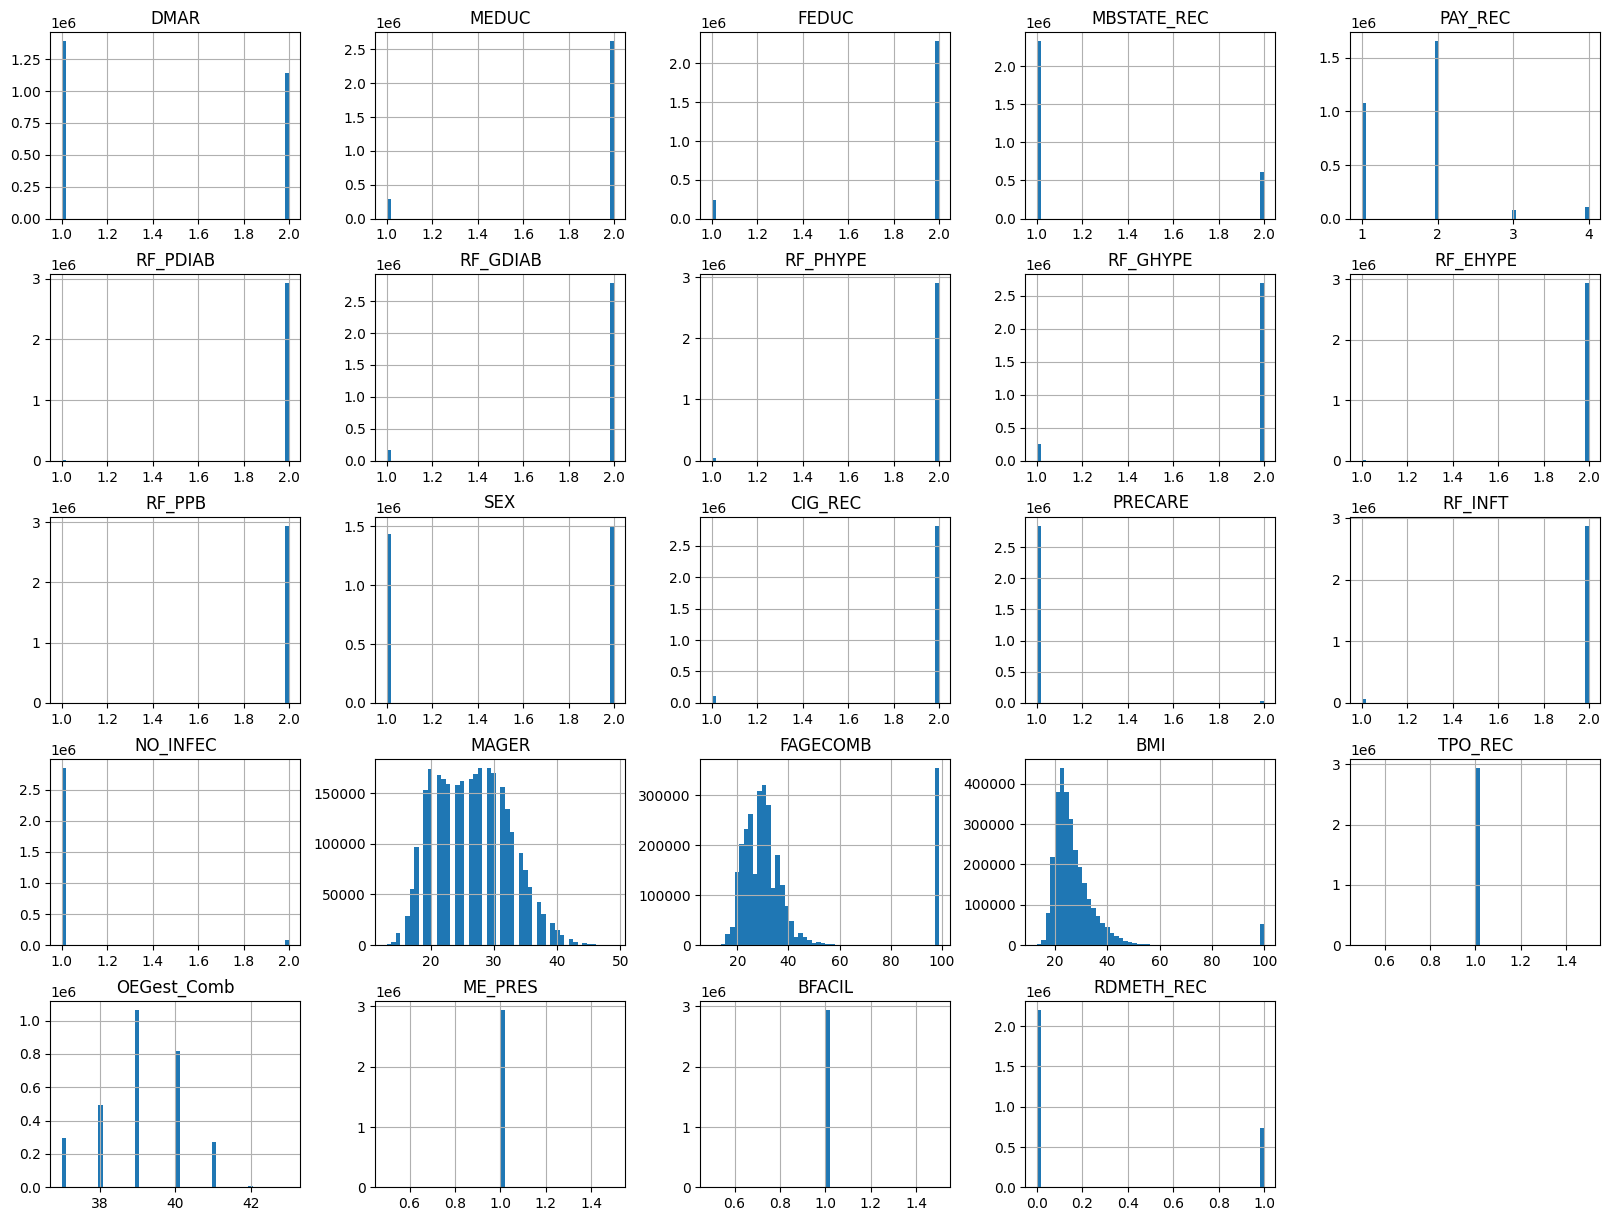

In [17]:
# check distribution
df_primary.hist(bins=50, figsize=(20,15))

In [18]:
df_primary.median()

DMAR            1.0
MEDUC           2.0
FEDUC           2.0
MBSTATE_REC     1.0
PAY_REC         2.0
RF_PDIAB        2.0
RF_GDIAB        2.0
RF_PHYPE        2.0
RF_GHYPE        2.0
RF_EHYPE        2.0
RF_PPB          2.0
SEX             2.0
CIG_REC         2.0
PRECARE         1.0
RF_INFT         2.0
NO_INFEC        1.0
MAGER          26.0
FAGECOMB       30.0
BMI            25.0
TPO_REC         1.0
OEGest_Comb    39.0
ME_PRES         1.0
BFACIL          1.0
RDMETH_REC      0.0
dtype: float64

In [19]:
# # secondary outcomes - Preterm birth: OEGest_Comb
# def assign_level(score):
#     if score >= 34 and score <= 36:
#         return 'Late preterm'
#     elif score < 34: 
#         return 'Early preterm'
#     elif score >= 37 and score <= 38:
#         return 'Early term'
#     else: 
#         return 'Full term'


# df_secondary = pd.DataFrame(df)
# df_secondary['Preterm Stage'] = df_secondary['OEGest_Comb'].apply(assign_level)
# df_secondary = df_secondary.drop(columns = 'OEGest_Comb')
# df_secondary = df_secondary.drop(columns = 'Preterm Birth')


# df_secondary = df_secondary.replace("Unknown", np.NAN)
# df_secondary = df_secondary.replace("Missing", np.NAN)
# df_secondary.head()

In [20]:
# len(df_secondary)

In [21]:
# len(df_secondary[df_secondary['Preterm Stage'] == 'Full term'])

In [22]:
# len(df_secondary[df_secondary['Preterm Stage'] == 'Early term'])

In [23]:
# len(df_secondary[df_secondary['Preterm Stage'] == 'Early preterm'])

In [24]:
# len(df_secondary[df_secondary['Preterm Stage'] == 'Late preterm'])

In [25]:
# df_secondary.isna().sum()

In [26]:
# # check distribution
# df_secondary.hist(bins=50, figsize=(20,15))

In [27]:
# # check distribution
# df_secondary['Preterm Stage'].hist(bins=50, figsize=(4,3))

In [28]:
# df_secondary.median()

In [29]:
# impute the missing data with medium
df_primary_imputed = df_primary.fillna(df_primary.median())

In [30]:
df_primary_imputed.head()

,DMAR,MEDUC,FEDUC,MBSTATE_REC,PAY_REC,RF_PDIAB,RF_GDIAB,RF_PHYPE,RF_GHYPE,RF_EHYPE,...,RF_INFT,NO_INFEC,MAGER,FAGECOMB,BMI,TPO_REC,OEGest_Comb,ME_PRES,BFACIL,RDMETH_REC
7,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,31,29,28.2,1,40,1,1,1.0
9,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,26,28,19.8,1,38,1,1,0.0
11,1.0,2.0,2.0,1.0,4.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,27,26,24.3,1,40,1,1,1.0
17,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,21,22,25.2,1,39,1,1,0.0
21,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2.0,1.0,25,27,32.2,1,39,1,1,0.0


In [31]:
# df_secondary_imputed = df_secondary.fillna(df_secondary.median())

In [32]:
# df_secondary_imputed.head()

### One-hot encoding for variable 'REC_PAY'

In [33]:
df_primary_encoded = pd.get_dummies(df_primary_imputed, columns = ['PAY_REC'], prefix = 'PAY_REC')

In [34]:
df_primary_encoded.head()

,DMAR,MEDUC,FEDUC,MBSTATE_REC,RF_PDIAB,RF_GDIAB,RF_PHYPE,RF_GHYPE,RF_EHYPE,RF_PPB,...,BMI,TPO_REC,OEGest_Comb,ME_PRES,BFACIL,RDMETH_REC,PAY_REC_1.0,PAY_REC_2.0,PAY_REC_3.0,PAY_REC_4.0
7,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,28.2,1,40,1,1,1.0,0,1,0,0
9,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,19.8,1,38,1,1,0.0,0,1,0,0
11,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,24.3,1,40,1,1,1.0,0,0,0,1
17,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,25.2,1,39,1,1,0.0,1,0,0,0
21,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,...,32.2,1,39,1,1,0.0,1,0,0,0


In [35]:
# df_secondary_encoded = pd.get_dummies(df_secondary_imputed, columns = ['PAY_REC'], prefix = 'PAY_REC')

In [36]:
# df_secondary_encoded.head()

### EDA + Correlation

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

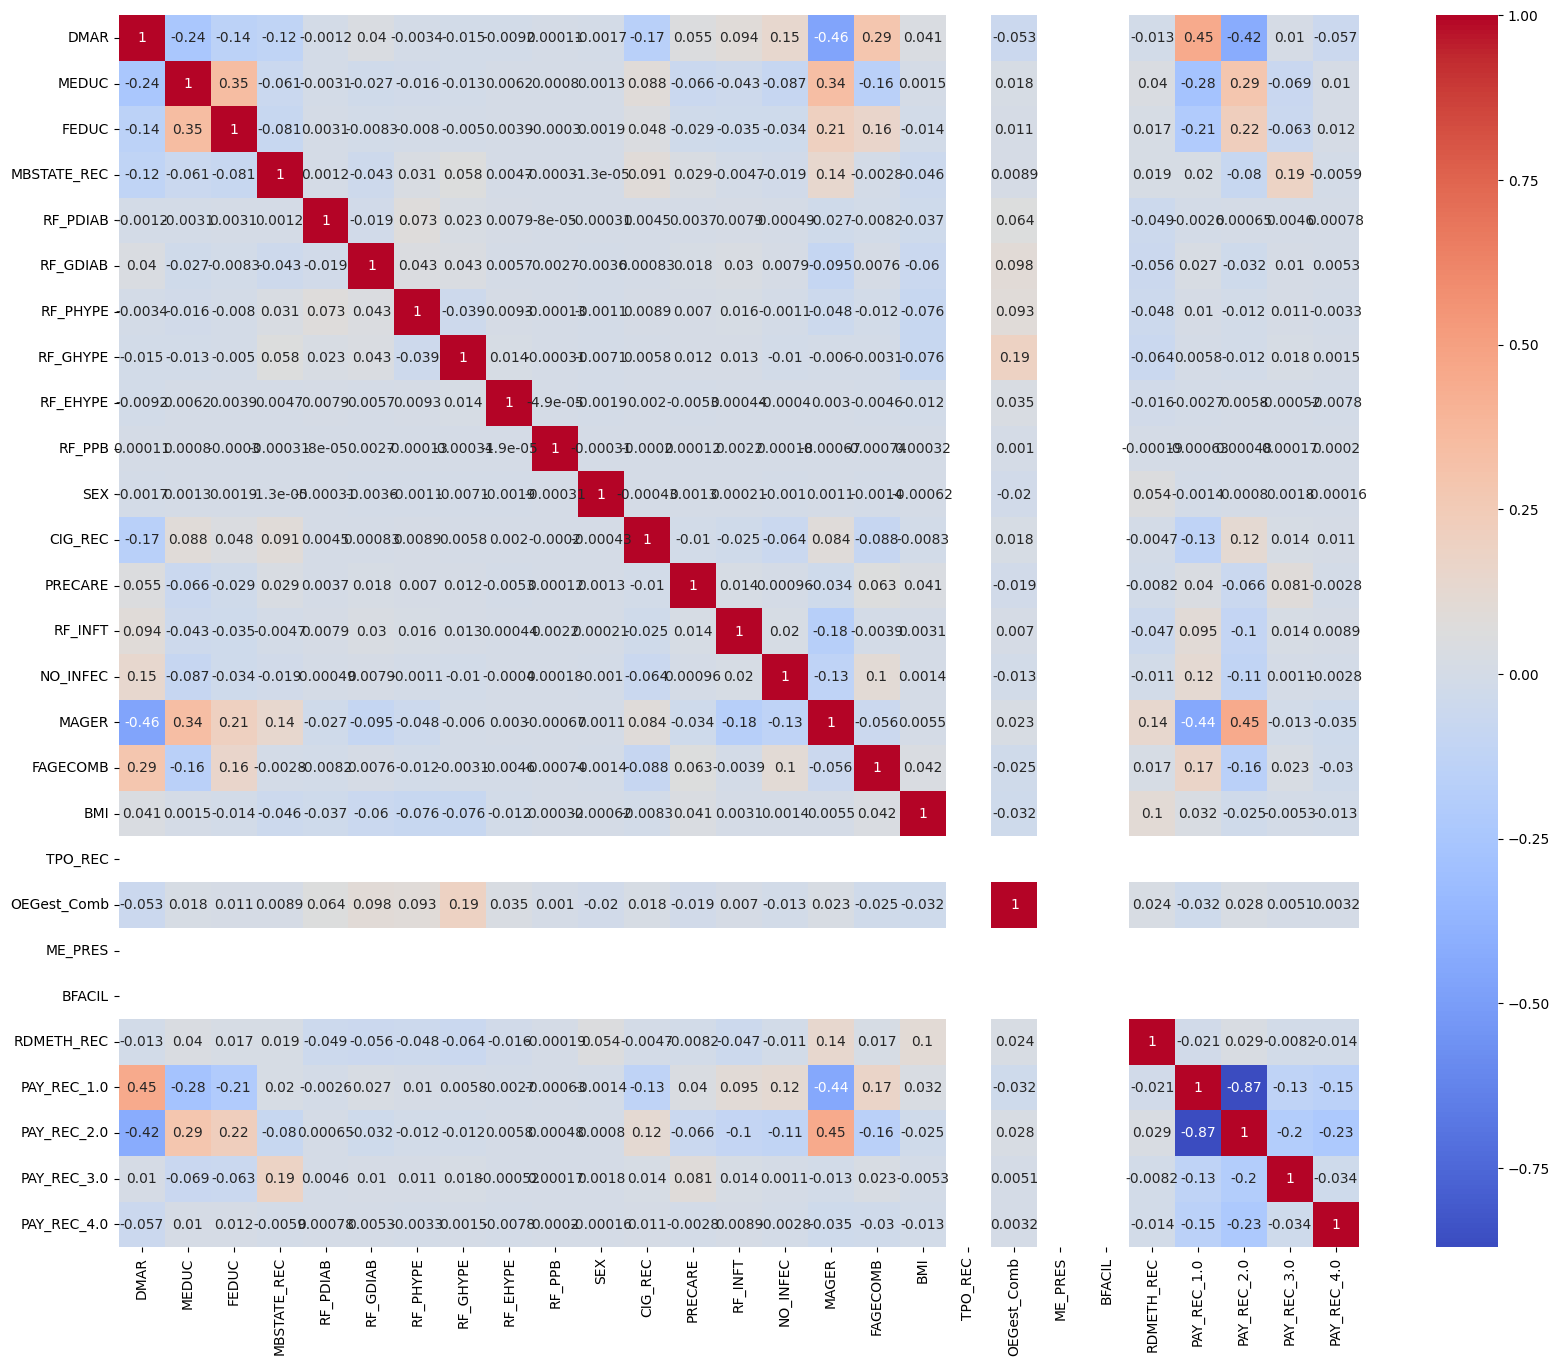

In [38]:
# check correlation
plt.figure(figsize=(20, 16))
sns.heatmap(df_primary_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

## Logistic Regression - primary outcome

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [40]:
X = df_primary_encoded.loc[:, ['DMAR', 'MEDUC', 'FEDUC', 'MBSTATE_REC', 'PAY_REC_1.0','PAY_REC_2.0', 'PAY_REC_3.0', 'PAY_REC_4.0', 'RF_PDIAB', 'RF_GDIAB', 'RF_PHYPE', 'RF_GHYPE', 'RF_EHYPE', 
               'RF_PPB', 'SEX', 'CIG_REC', 'PRECARE', 'RF_INFT', 'NO_INFEC', 'MAGER', 'FAGECOMB', 'BMI', 'TPO_REC', 'OEGest_Comb']] 
y = df_primary_encoded.loc[:, ['RDMETH_REC']]

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [42]:
logreg = LogisticRegression(max_iter=100)

In [43]:
logreg.fit(X_train, y_train.to_numpy().ravel())

/home/ziwen/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [44]:
y_pred = logreg.predict(X_test)

In [45]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.98      0.85    880939
         1.0       0.49      0.05      0.09    296438

    accuracy                           0.75   1177377
   macro avg       0.62      0.52      0.47   1177377
weighted avg       0.69      0.75      0.66   1177377

Confusion Matrix:
 [[866624  14315]
 [282484  13954]]


In [46]:
accuracy_score(y_test, y_pred)

0.7479150688352159

In [47]:
# another default logistic regression

In [48]:
logit_model = sm.Logit(y_train,X_train)

In [49]:
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.541022
         Iterations 6


In [50]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:             RDMETH_REC   No. Observations:              1766065
Model:                          Logit   Df Residuals:                  1766042
Method:                           MLE   Df Model:                           22
Date:                Wed, 15 Nov 2023   Pseudo R-squ.:                 0.04123
Time:                        12:39:44   Log-Likelihood:            -9.5548e+05
converged:                       True   LL-Null:                   -9.9657e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
DMAR            0.2470      0.005     53.739      0.000       0.238       0.256
MEDUC           0.0584      0.007      7.948      0.000       0.044       0.073
FEDUC          -0.0401      0.008     -5.328    

In [51]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

                 2.5%     97.5%        OR
DMAR         1.268733  1.291802  1.280215
MEDUC        1.044962  1.075486  1.060114
FEDUC        0.946572  0.974942  0.960652
MBSTATE_REC  1.035973  1.054774  1.045331
PAY_REC_1.0  0.000000       inf  1.226835
PAY_REC_2.0  0.000000       inf  1.053663
PAY_REC_3.0  0.000000       inf  1.037998
PAY_REC_4.0  0.000000       inf  1.045421
RF_PDIAB     0.338514  0.366159  0.352065
RF_GDIAB     0.689553  0.709179  0.699297
RF_PHYPE     0.544386  0.572592  0.558311
RF_GHYPE     0.594486  0.608584  0.601494
RF_EHYPE     0.476878  0.543328  0.509020
RF_PPB       0.022289  7.580003  0.411034
SEX          1.295489  1.313745  1.304585
CIG_REC      0.891076  0.924573  0.907670
PRECARE      0.808797  0.863063  0.835490
RF_INFT      0.718173  0.751183  0.734493
NO_INFEC     0.979003  1.022117  1.000327
MAGER        1.069813  1.071424  1.070618
FAGECOMB     1.000116  1.000450  1.000283
BMI          1.015717  1.016269  1.015993
TPO_REC      0.000000       inf  1

In [52]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

In [53]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

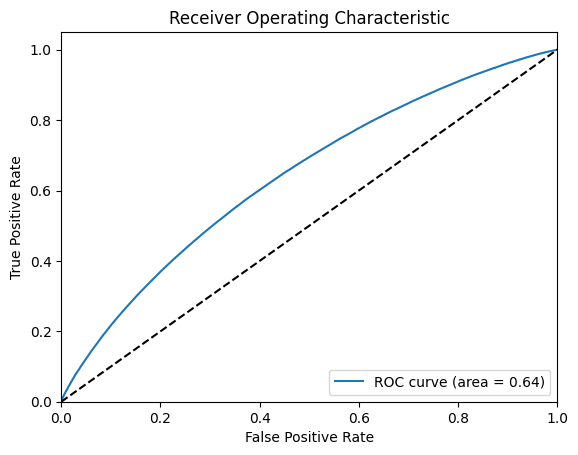

In [54]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression - balanced classes

In [55]:
logreg = LogisticRegression(max_iter=100, class_weight='balanced')

logreg.fit(X_train, y_train.to_numpy().ravel())

y_pred = logreg.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

/home/ziwen/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.65      0.72    880939
         1.0       0.35      0.56      0.43    296438

    accuracy                           0.63   1177377
   macro avg       0.58      0.60      0.58   1177377
weighted avg       0.70      0.63      0.65   1177377

Confusion Matrix:
 [[570604 310335]
 [130774 165664]]


In [56]:
accuracy_score(y_test, y_pred)

0.6253460021726261

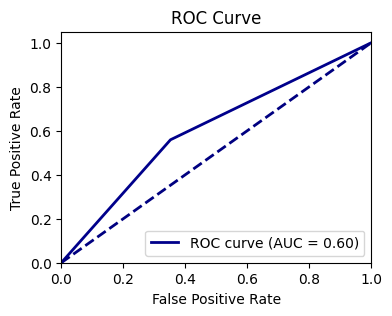

In [57]:
# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate ROC-AUC score
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Logistic Regression - Sampling

In [58]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# Oversampling
oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [59]:
# # Undersampling
# undersampler = RandomUnderSampler(sampling_strategy='majority')
# X_resampled, y_resampled = undersampler.fit_resample(X, y)

# # SMOTE
# sampler = SMOTEENN(sampling_strategy='minority')
# X_resampled, y_resampled = sampler.fit_resample(X, y)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=0)

### Logistic Regression - penalty

In [61]:
from sklearn.preprocessing import StandardScaler

# standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
# For L1 (Lasso) regularization
logistic_reg_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=100, class_weight='balanced')

# For L2 (Ridge) regularization
logistic_reg_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=100, class_weight='balanced')

In [63]:
# fit model
logistic_reg_l1.fit(X_train, y_train)
logistic_reg_l2.fit(X_train, y_train)

/home/ziwen/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ziwen/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced')

In [64]:
# make prediction
y_pred_l1 = logistic_reg_l1.predict(X_test)
y_pred_l2 = logistic_reg_l2.predict(X_test)

In [65]:
# For L1 regularization
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
report_l1 = classification_report(y_test, y_pred_l1)

# For L2 regularization
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
report_l2 = classification_report(y_test, y_pred_l2)

print("L1 Regularization - Accuracy:", accuracy_l1)
print("L1 Regularization - Classification Report:\n", report_l1)

print("L2 Regularization - Accuracy:", accuracy_l2)
print("L2 Regularization - Classification Report:\n", report_l2)

L1 Regularization - Accuracy: 0.6042494742786763
L1 Regularization - Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.64      0.62    881394
         1.0       0.61      0.56      0.59    880471

    accuracy                           0.60   1761865
   macro avg       0.60      0.60      0.60   1761865
weighted avg       0.60      0.60      0.60   1761865

L2 Regularization - Accuracy: 0.6042545825020645
L2 Regularization - Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.64      0.62    881394
         1.0       0.61      0.56      0.59    880471

    accuracy                           0.60   1761865
   macro avg       0.60      0.60      0.60   1761865
weighted avg       0.60      0.60      0.60   1761865



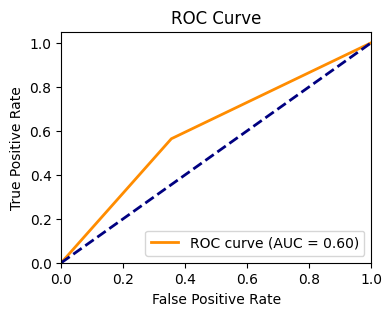

In [66]:
# For L1 regularization

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_l1)
# Calculate ROC-AUC score
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

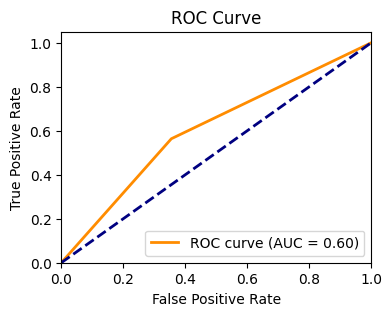

In [68]:
# For L2 regularization

# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_l2)
# Calculate ROC-AUC score
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### VIF score - detecting Multicollinearity

In [72]:
# # Check VIF score - Detecting Multicollinearity

# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # VIF dataframe
# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(X.values, i)
#                           for i in range(len(X.columns))]
  
# print(vif_data)

### Step-wise Feature Selection

In [73]:
# # step-wise feature selection
# def stepwise_selection(X, y, 
#                            initial_list=[], 
#                            threshold_in=0.01, 
#                            threshold_out = 0.05, 
#                            verbose=True):
#         """ Perform a forward-backward feature selection 
#         based on p-value from statsmodels.api.OLS
#         Arguments:
#             X - pandas.DataFrame with candidate features
#             y - list-like with the target
#             initial_list - list of features to start with (column names of X)
#             threshold_in - include a feature if its p-value < threshold_in
#             threshold_out - exclude a feature if its p-value > threshold_out
#             verbose - whether to print the sequence of inclusions and exclusions
#         Returns: list of selected features 
#         Always set threshold_in < threshold_out to avoid infinite looping.
#         See https://en.wikipedia.org/wiki/Stepwise_regression for the details
#         """
#         included = list(initial_list)
#         while True:
#             changed=False
            
#             # forward step
#             excluded = list(set(X.columns)-set(included))
#             new_pval = pd.Series(index=excluded)
#             for new_column in excluded:
#                 model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
#                 new_pval[new_column] = model.pvalues[new_column]
#             best_pval = new_pval.min()
#             if best_pval < threshold_in:
#                 best_feature = new_pval.idxmin()
#                 included.append(best_feature)
#                 changed=True
#                 if verbose:
#                     print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

#             # backward step
#             model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
#             # use all coefs except intercept
#             pvalues = model.pvalues.iloc[1:]
#             worst_pval = pvalues.max() # null if pvalues is empty
#             if worst_pval > threshold_out:
#                 changed=True
#                 worst_feature = pvalues.idxmax()
#                 included.remove(worst_feature)
#                 if verbose:
#                     print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
#             if not changed:
#                 break
#         return included

# result = stepwise_selection(X_train, y_train)

# print('resulting features:')
# print(result)

resulting features: ['TPO_REC', 'PRECARE', 'FAGECOMB', 'CIG_REC', 'PAY_REC_1.0', 'BMI', 'RF_GHYPE', 'RF_PHYPE', 'RF_EHYPE', 'RF_PPB', 'RF_PDIAB', 'RF_GDIAB', 'DMAR', 'SEX', 'RF_INFT', 'MAGER', 'MEDUC', 'MBSTATE_REC', 'NO_INFEC', 'PAY_REC_4.0', 'FEDUC', 'PAY_REC_2.0']

## Gradient boosted machines (GBM)

In [74]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [75]:
X = df_primary_encoded.loc[:, ['DMAR', 'MEDUC', 'FEDUC', 'MBSTATE_REC', 'PAY_REC_1.0','PAY_REC_2.0', 'PAY_REC_3.0', 'PAY_REC_4.0', 'RF_PDIAB', 'RF_GDIAB', 'RF_PHYPE', 'RF_GHYPE', 'RF_EHYPE', 
               'RF_PPB', 'SEX', 'CIG_REC', 'PRECARE', 'RF_INFT', 'NO_INFEC', 'MAGER', 'FAGECOMB', 'BMI', 'TPO_REC', 'OEGest_Comb']] 
y = df_primary_encoded.loc[:, ['RDMETH_REC']]

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [77]:
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

In [78]:
gbm.fit(X_train, y_train)

/home/ziwen/.local/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=1, random_state=42)

In [79]:
y_pred = gbm.predict(X_test)

In [80]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 0.07098430266461925


### Gradient Boosting Classifier

In [81]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [82]:
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

In [83]:
gbc.fit(X_train, y_train)

/home/ziwen/.local/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=1, random_state=42)

In [84]:
y_pred_proba = gbc.predict_proba(X_test)[:,1]

In [85]:
fpr, tpr , thresholds= roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

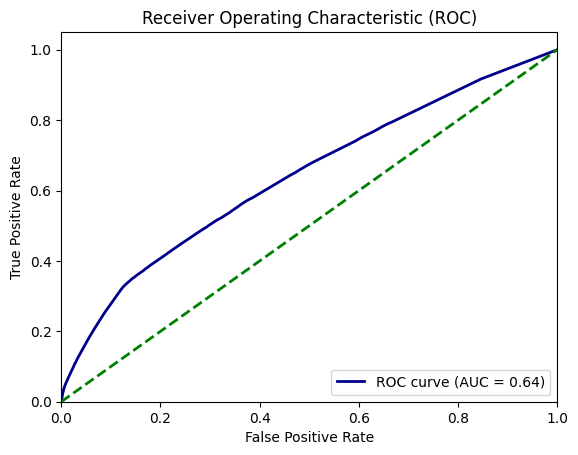

In [86]:
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# 

## Random Forest

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [89]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [90]:
rf.fit(X_train, y_train)

/home/ziwen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(random_state=42)

In [91]:
y_pred = rf.predict(X_test)

In [92]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95   1243306
           1       0.15      0.04      0.06    107353

    accuracy                           0.91   1350659
   macro avg       0.53      0.51      0.51   1350659
weighted avg       0.86      0.91      0.88   1350659

Confusion Matrix:
 [[1218549   24757]
 [ 103143    4210]]


### Random Forest Classifier

In [93]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [94]:
rfc = RandomForestClassifier()

In [95]:
rfc.fit(X_train, y_train)

/home/ziwen/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [96]:
y_pred_proba = rfc.predict_proba(X_test)[:, 1]

In [97]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [98]:
roc_auc = auc(fpr, tpr)

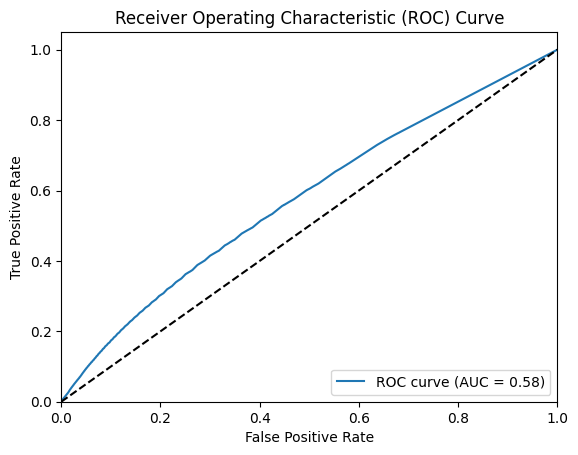

In [99]:
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Deep Learning Models

In [100]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models

2023-10-10 10:07:20.085341: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-10 10:07:20.683404: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-10 10:07:20.683509: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-10 10:07:21.990994: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [101]:
# Split the data
X = df_primary_encoded.loc[:, ['DMAR', 'MEDUC', 'FEDUC', 'MBSTATE_REC', 'PAY_REC_1.0','PAY_REC_2.0', 'PAY_REC_3.0', 'PAY_REC_4.0', 'RF_PDIAB', 'RF_GDIAB', 'RF_PHYPE', 'RF_GHYPE', 'RF_EHYPE', 
               'RF_PPB', 'SEX', 'CIG_REC', 'PRECARE', 'RF_INFT', 'NO_INFEC', 'MAGER', 'FAGECOMB', 'BMI', 'TPO_REC', 'OEGest_Comb']] 
y = df_primary_encoded.loc[:, ['RDMETH_REC']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
# Standardize/normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
from keras.models import Sequential
from keras.layers import Dense

In [104]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(23,))) # input_dim=23
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

2023-10-10 10:07:26.931241: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-10 10:07:26.933575: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-10 10:07:26.933982: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-10-10 10:07:26.934348: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-10-10 10:07:26.934704: W tensorflow/c

In [105]:
# Train the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1000)

Epoch 1/10
2702/2702 [==============================] - 15s 5ms/step - loss: 0.2673 - accuracy: 0.9199 - val_loss: 0.2653 - val_accuracy: 0.9207
Epoch 2/10
2702/2702 [==============================] - 14s 5ms/step - loss: 0.2657 - accuracy: 0.9202 - val_loss: 0.2647 - val_accuracy: 0.9207
Epoch 3/10
2702/2702 [==============================] - 14s 5ms/step - loss: 0.2654 - accuracy: 0.9202 - val_loss: 0.2647 - val_accuracy: 0.9207
Epoch 4/10
2702/2702 [==============================] - 14s 5ms/step - loss: 0.2653 - accuracy: 0.9203 - val_loss: 0.2644 - val_accuracy: 0.9207
Epoch 5/10
2702/2702 [==============================] - 14s 5ms/step - loss: 0.2652 - accuracy: 0.9203 - val_loss: 0.2645 - val_accuracy: 0.9207
Epoch 6/10
2702/2702 [==============================] - 14s 5ms/step - loss: 0.2651 - accuracy: 0.9203 - val_loss: 0.2645 - val_accuracy: 0.9208
Epoch 7/10
2702/2702 [==============================] - 14s 5ms/step - loss: 0.2651 - accuracy: 0.9203 - val_loss: 0.2642 - val_ac

[]

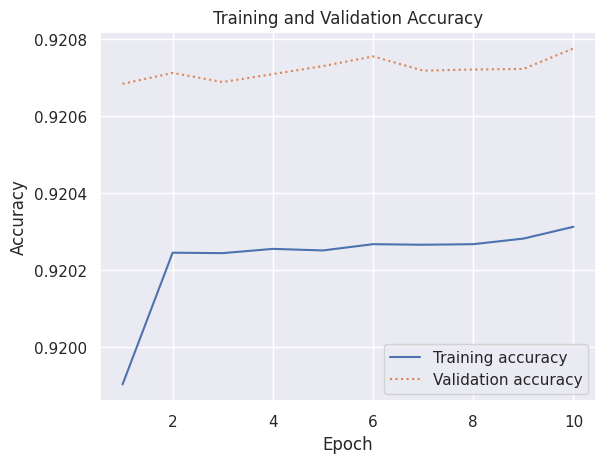

In [106]:
# Evaluate the model
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [107]:
y_predicted = model.predict(X_test)

21105/21105 [==============================] - 17s 790us/step


In [108]:
from sklearn.metrics import roc_curve, auc

fpr, tpr , thresholds= roc_curve(y_test, y_predicted)
roc_auc = auc(fpr, tpr)

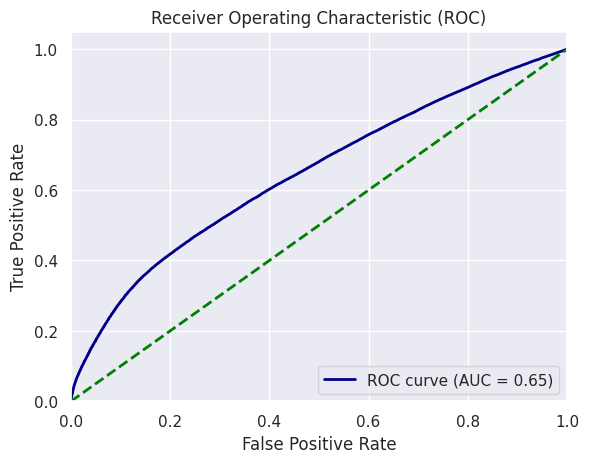

In [109]:
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [110]:
y_test.shape

(675330, 1)

In [111]:
y_predicted.shape

(675330, 1)

In [112]:
X_test.shape

(675330, 23)

In [113]:
X_train.shape

(2701317, 23)

In [114]:
# # Split the data into train and test sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Further split the training data into train and validation sets (80% train, 20% validation)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [115]:
# print(len(X_train), 'X_train examples')
# print(len(X_val), 'X_validation examples')
# print(len(X_test), 'X_test examples')

In [116]:
# print(len(y_train), 'y_train examples')
# print(len(y_val), 'y_validation examples')
# print(len(y_test), 'y_test examples')

### Model 2 - imbalanced classification - dl

In [117]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [118]:
neg, pos = np.bincount(y['Preterm Birth'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 3376647
    Positive: 269089 (7.97% of total)



In [119]:
model_df = df_primary_encoded.loc[:, ['DMAR', 'MEDUC', 'FEDUC', 'MBSTATE_REC', 'PAY_REC_1.0','PAY_REC_2.0', 'PAY_REC_3.0', 'PAY_REC_4.0', 'RF_PDIAB', 'RF_GDIAB', 'RF_PHYPE', 'RF_GHYPE', 'RF_EHYPE', 
               'RF_PPB', 'SEX', 'CIG_REC', 'PRECARE', 'RF_INFT', 'NO_INFEC', 'MAGER', 'FAGECOMB', 'BMI', 'TPO_REC', 'OEGest_Comb', 'RDMETH_REC']]

In [120]:
model_df.shape

(3376647, 24)

In [121]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(model_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Preterm Birth'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Preterm Birth'))
test_labels = np.array(test_df.pop('Preterm Birth'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [122]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape) # y_train
print('Validation labels shape:', val_labels.shape) # y_val
print('Test labels shape:', test_labels.shape) # y_test

print('Training features shape:', train_features.shape) # X_train
print('Validation features shape:', val_features.shape) # X_val
print('Test features shape:', test_features.shape) # X_test

Training labels shape: (2161053,)
Validation labels shape: (540264,)
Test labels shape: (675330,)
Training features shape: (2161053, 23)
Validation features shape: (540264, 23)
Test features shape: (675330, 23)


In [123]:
# pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
# neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

# sns.jointplot(x=pos_df['BMI'], y=pos_df['TPO_REC'],
#               kind='hex', xlim=(-3,3), ylim=(-3,3))
# plt.suptitle("Positive distribution")

# sns.jointplot(x=neg_df['BMI'], y=neg_df['TPO_REC'],
#               kind='hex', xlim=(-3,3), ylim=(-3,3))
# _ = plt.suptitle("Negative distribution")

In [124]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
        
    model = keras.Sequential([
        keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

    model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

    return model

In [125]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [126]:
model = make_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                384       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [127]:
model.predict(train_features[:20]) # train the model using the first 20 samples

1/1 [==============================] - 0s 35ms/step


array([[0.9235825 ],
       [0.8435111 ],
       [0.77661145],
       [0.8215181 ],
       [0.9285309 ],
       [0.93247736],
       [0.9517874 ],
       [0.9156384 ],
       [0.82283723],
       [0.92063403],
       [0.8442598 ],
       [0.92331195],
       [0.8678951 ],
       [0.90713215],
       [0.9667503 ],
       [0.7823778 ],
       [0.8545187 ],
       [0.6104773 ],
       [0.8438367 ],
       [0.84261537]], dtype=float32)

In [128]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 1.9554


In [129]:
# true initial bias
initial_bias = np.log([pos/neg])
initial_bias

array([-2.44655031])

In [130]:
model = make_model(output_bias = initial_bias)
model.predict(train_features[:20])

1/1 [==============================] - 0s 29ms/step


array([[0.00341288],
       [0.04778419],
       [0.03771675],
       [0.05305563],
       [0.06737641],
       [0.01821159],
       [0.01894292],
       [0.03126591],
       [0.08367344],
       [0.08437307],
       [0.17273077],
       [0.08197407],
       [0.04687335],
       [0.02367448],
       [0.01463806],
       [0.09491206],
       [0.06797526],
       [0.10048618],
       [0.00966035],
       [0.05535696]], dtype=float32)

In [131]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.3065


In [132]:
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
model.save_weights(initial_weights)

In [133]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [134]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [135]:
def plot_loss(history, label, n):
    # Use a log scale to show the wide range of values.
    plt.semilogy(history.epoch,  history.history['loss'],
                 color=colors[n], label='Train '+label)
    plt.semilogy(history.epoch,  history.history['val_loss'],
                 color=colors[n], label='Val '+label,
                 linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend()
    
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

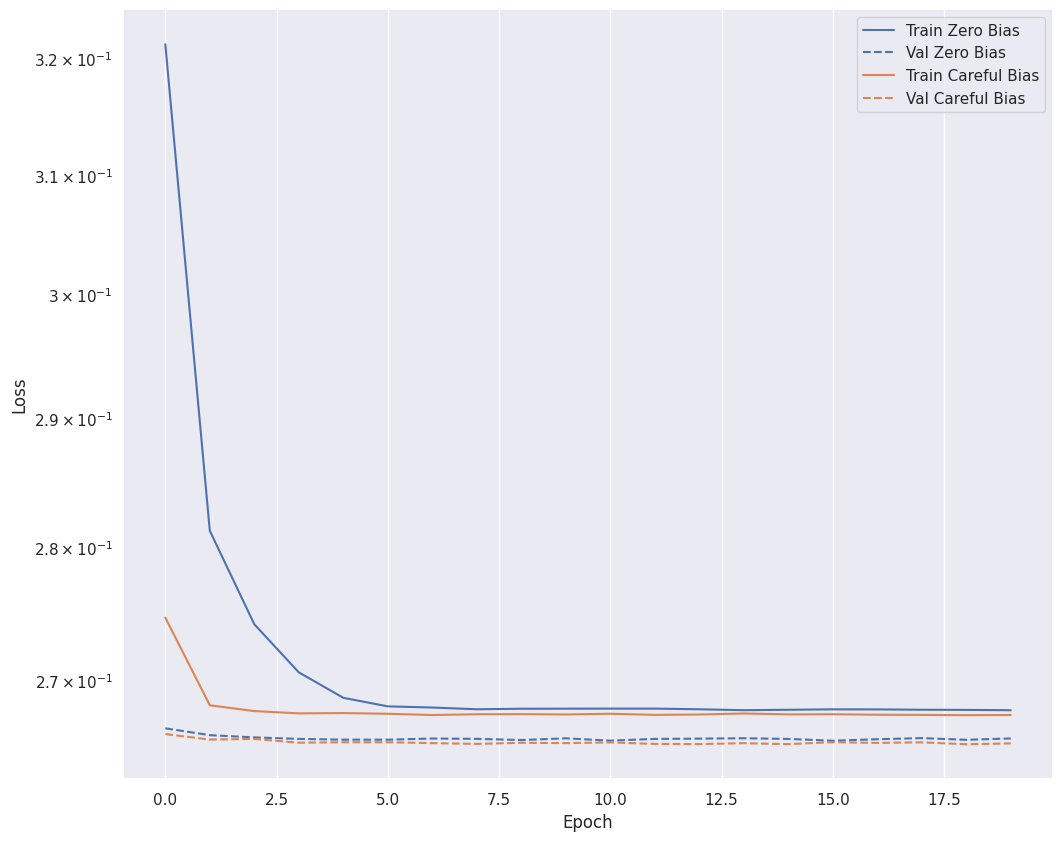

In [136]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

#### Train model

In [137]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
1056/1056 [==============================] - 3s 2ms/step - loss: 0.2747 - tp: 1117.0000 - fp: 2193.0000 - tn: 2483778.0000 - fn: 214229.0000 - accuracy: 0.9199 - precision: 0.3375 - recall: 0.0052 - auc: 0.6077 - prc: 0.1350 - val_loss: 0.2660 - val_tp: 29.0000 - val_fp: 15.0000 - val_tn: 497290.0000 - val_fn: 42930.0000 - val_accuracy: 0.9205 - val_precision: 0.6591 - val_recall: 6.7506e-04 - val_auc: 0.6400 - val_prc: 0.1594
Epoch 2/100
1056/1056 [==============================] - 2s 2ms/step - loss: 0.2682 - tp: 963.0000 - fp: 1302.0000 - tn: 1987364.0000 - fn: 171424.0000 - accuracy: 0.9201 - precision: 0.4252 - recall: 0.0056 - auc: 0.6328 - prc: 0.1494 - val_loss: 0.2658 - val_tp: 33.0000 - val_fp: 14.0000 - val_tn: 497291.0000 - val_fn: 42926.0000 - val_accuracy: 0.9205 - val_precision: 0.7021 - val_recall: 7.6817e-04 - val_auc: 0.6411 - val_prc: 0.1596
Epoch 3/100
1056/1056 [==============================] - 2s 2ms/step - loss: 0.2678 - tp: 985.0000 - fp: 1348.0000 

[]

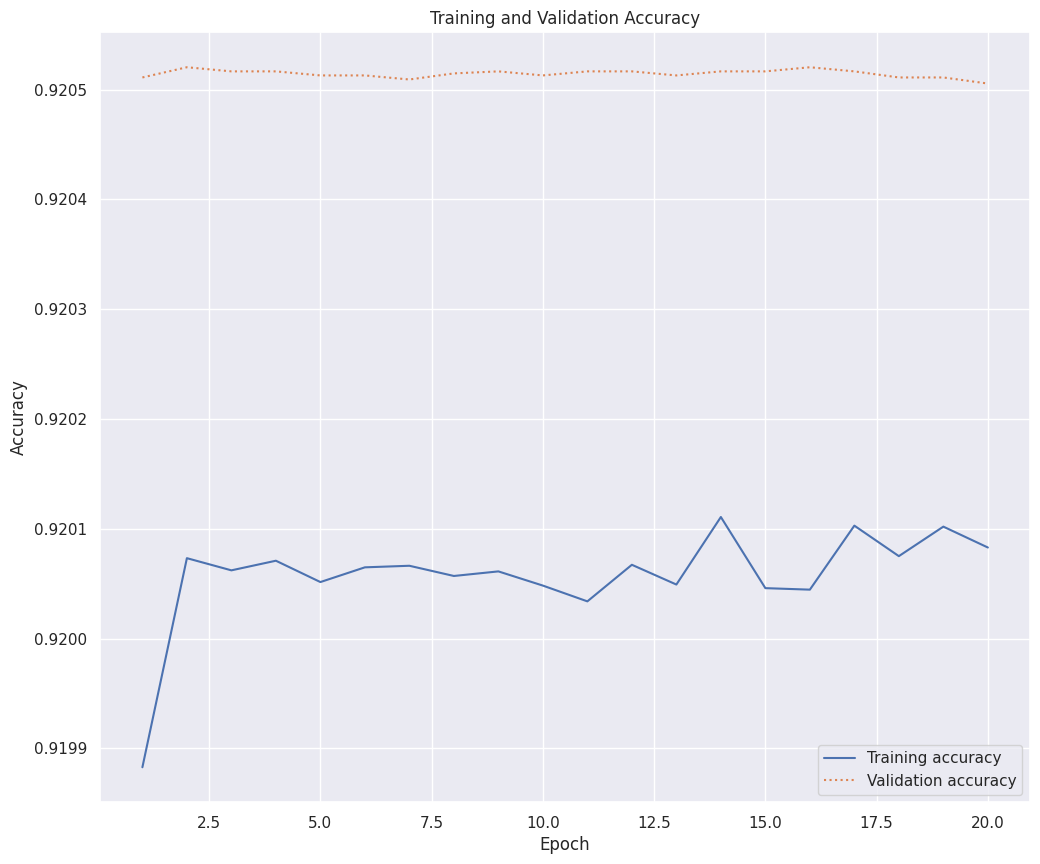

In [138]:
# Evaluate the model
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = baseline_history.history['accuracy']
val = baseline_history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [139]:
y_predicted = model.predict(test_features)

21105/21105 [==============================] - 12s 545us/step


In [140]:
from sklearn.metrics import roc_curve, auc

fpr, tpr , thresholds= roc_curve(test_labels, y_predicted)
roc_auc = auc(fpr, tpr)

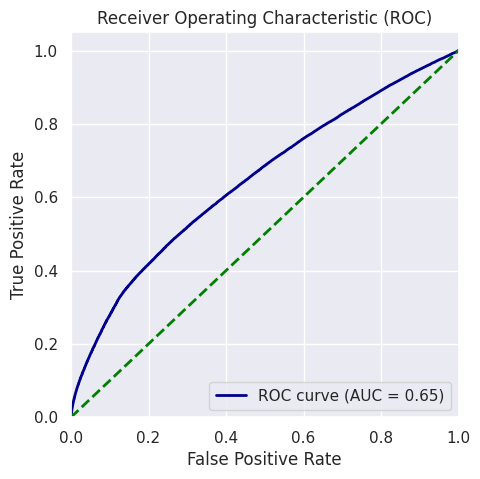

In [141]:
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkblue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [142]:
def plot_metrics(history):
    metrics = ['loss', 'prc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2, 2, n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                 color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8, 1])
        else:
            plt.ylim([0, 1])

        plt.legend()

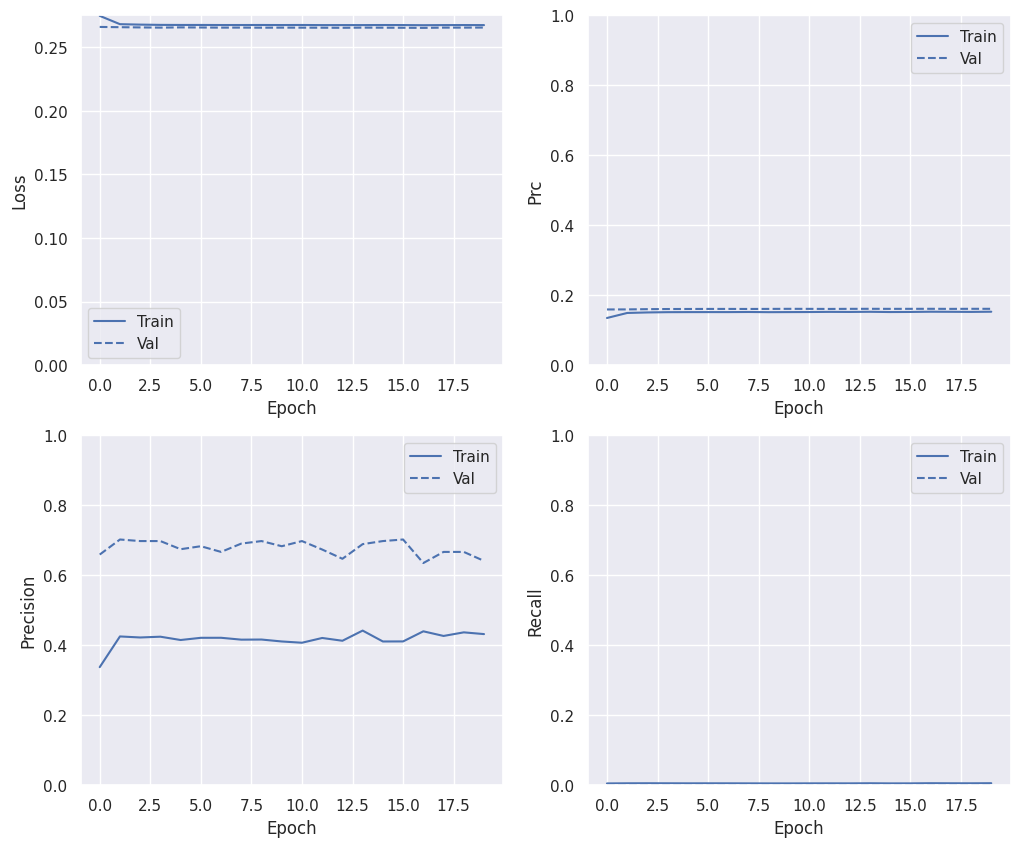

In [143]:
plot_metrics(baseline_history)

In [144]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

330/330 [==============================] - 0s 621us/step


In [145]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.26528820395469666
tp :  38.0
fp :  31.0
tn :  621556.0
fn :  53705.0
accuracy :  0.9204300045967102
precision :  0.5507246255874634
recall :  0.0007070688297972083
auc :  0.6466603875160217
prc :  0.1639784574508667

Legitimate Transactions Detected (True Negatives):  621556
Legitimate Transactions Incorrectly Detected (False Positives):  31
Fraudulent Transactions Missed (False Negatives):  53705
Fraudulent Transactions Detected (True Positives):  38
Total Fraudulent Transactions:  53743


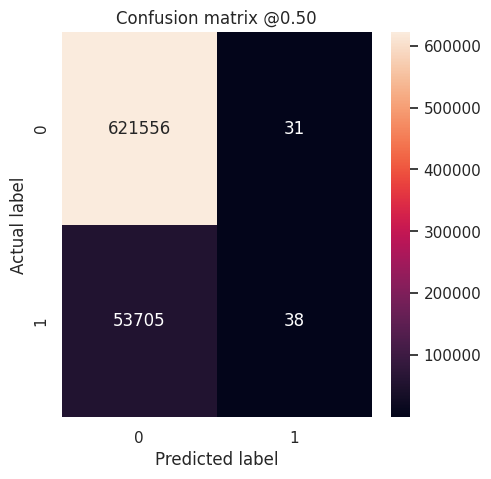

In [146]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [147]:
import sklearn.metrics
import matplotlib.pyplot as plt

def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

    plt.plot(100 * fp, 100 * tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5, 20])
    plt.ylim([80, 100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

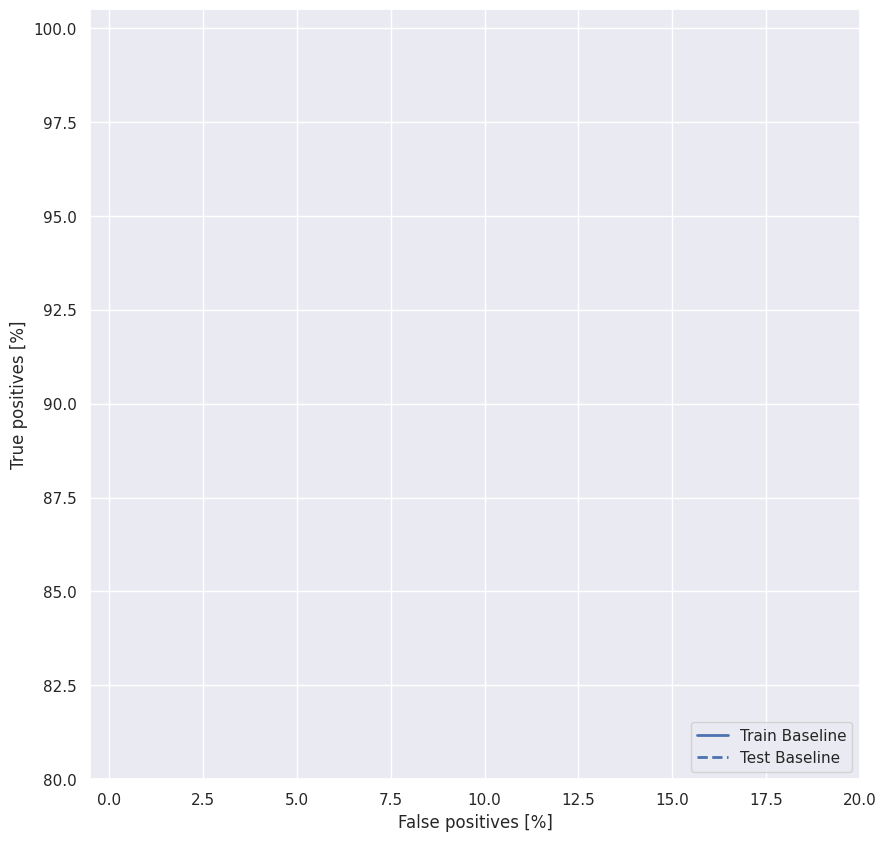

In [148]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right');